# DATA VISUALIZATION

In [1]:
suppressMessages(library(dplyr))
library(tidyr)

In [2]:
directory = setwd('/dsa/groups/capstonesp2022/on-campus/group_2')
list.files(directory,full.names = TRUE,recursive = TRUE)

[1] "/dsa/home/nkg7b3/jupyter/sp22Capstone_02_Group02/GroupProducts/Milestone3/m3_data_viz.ipynb"
[2] "/dsa/home/nkg7b3/jupyter/sp22Capstone_02_Group02/GroupProducts/Milestone3/README.md"

In [3]:
df_dir = read.csv('/dsa/groups/capstonesp2022/on-campus/group_2/raw_extract/df_dir.csv',stringsAsFactors = FALSE)

In [4]:
colnames(df_dir)

[1] "X"                              "year"                          
 [3] "unitid"                         "inst_name"                     
 [5] "address"                        "state_abbr"                    
 [7] "zip"                            "phone_number"                  
 [9] "city"                           "county_name"                   
[11] "offering_highest_level"         "region"                        
[13] "inst_control"                   "institution_level"             
[15] "sector"                         "fips"                          
[17] "chief_admin_name"               "chief_admin_title"             
[19] "hbcu"                           "primarily_postsecondary"       
[21] "hospital"                       "medical_degree"                
[23] "tribal_college"                 "ein"                           
[25] "urban_centric_locale"           "opeid"                         
[27] "offering_highest_degree"        "currently_active_ipeds"        
[29] "date_closed"                    "duns"                          
[31] "title_iv_indicator"             "offering_undergrad"            
[33] "offering_grad"                  "inst_status"                   
[35] "newid"                          "year_deleted"                  
[37] "url_school"                     "degree_granting"               
[39] "open_public"                    "postsec_public_active"         
[41] "postsec_public_active_title_iv" "inst_system_flag"              
[43] "inst_system_name"               "reporting_method"              
[45] "inst_category"                  "land_grant"                    
[47] "inst_size"                      "inst_alias"                    
[49] "url_fin_aid"                    "url_application"               
[51] "cbsa"                           "cbsa_type"                     
[53] "csa"                            "necta"                         
[55] "comparison_group"               "longitude"                     
[57] "latitude"                       "county_fips"                   
[59] "congress_district_id"           "cc_basic_2010"                 
[61] "cc_instruc_undergrad_2010"      "cc_instruc_grad_2010"          
[63] "cc_undergrad_2010"              "cc_enroll_2010"                
[65] "cc_size_setting_2010"           "cc_basic_2000"                 
[67] "url_netprice"                   "comparison_group_custom"       
[69] "url_veterans"                   "url_athletes"                  
[71] "cc_basic_2015"                  "cc_instruc_undergrad_2015"     
[73] "cc_instruc_grad_2015"           "cc_undergrad_2015"             
[75] "cc_enroll_2015"                 "cc_basic_2018"                 
[77] "cc_instruc_undergrad_2018"      "cc_instruc_grad_2018"          
[79] "cc_undergrad_2018"              "cc_enroll_2018"                
[81] "cc_size_setting_2018"           "cc_size_setting_2015"          
[83] "url_disability_services"

In [5]:
df_dir_multicampus_flag = df_dir %>% filter(degree_granting=='Yes') %>% 
separate(opeid, into=c('parent_opeid','child_opeid'),sep = -2,remove = FALSE)%>% group_by(year,parent_opeid) %>% summarise(no_of_campuses = n()) %>%
mutate(multi_campus_flag = ifelse((no_of_campuses>1 & parent_opeid != "" & year != ""),"Yes","No")) %>% ungroup() %>% 
filter(no_of_campuses>1 & parent_opeid != "" & year != "" ) %>% arrange(year,parent_opeid,no_of_campuses)

dim(df_dir_multicampus_flag)
colnames(df_dir_multicampus_flag)

# dim(df_dir %>% filter(degree_granting=='Yes'))
df_dir_multicampus_flag %>% filter(parent_opeid == "001055" )


df_dir %>% filter(degree_granting=='Yes') %>% 
separate(opeid, into=c('parent_opeid','child_opeid'),sep = -2,remove = FALSE)%>% 
select(year, unitid,state_abbr,inst_name,parent_opeid,child_opeid,opeid,degree_granting,latitude,longitude,city,inst_system_name,inst_system_flag)  %>% 
filter(parent_opeid == "001055" |
      parent_opeid == '030106')

[1] 4150    4

[1] "year"              "parent_opeid"      "no_of_campuses"   
[4] "multi_campus_flag"

year,parent_opeid,no_of_campuses,multi_campus_flag
<int>,<chr>,<int>,<chr>
2005,001055,2,Yes
2006,001055,2,Yes
2007,001055,2,Yes
2008,001055,2,Yes
2009,001055,2,Yes
2010,001055,2,Yes


year,unitid,state_abbr,inst_name,parent_opeid,child_opeid,opeid,degree_granting,latitude,longitude,city,inst_system_name,inst_system_flag
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2005,100706,AL,University of Alabama in Huntsville,001055,00,00105500,Yes,NA,NA,Huntsville,University of Alabama System,Yes
2005,100733,AL,University of Alabama System Office,001055,A1,001055A1,Yes,NA,NA,Tuscaloosa,-2,Yes
2005,420307,AL,Virginia College-Birmingham,030106,00,03010600,Yes,NA,NA,Birmingham,-2,Not applicable
2005,420316,AL,Virginia College-Huntsville,030106,02,03010602,Yes,NA,NA,Huntsville,-2,Not applicable
2005,441919,MS,Virginia College-Jackson,030106,03,03010603,Yes,NA,NA,Jackson,-2,Not applicable
2005,441928,TX,Virginia College at Austin,030106,04,03010604,Yes,NA,NA,Austin,-2,Not applicable
2005,443614,AL,Virginia College Technical,030106,A1,030106A1,Yes,NA,NA,Pelham,-2,Not applicable
2006,100706,AL,University of Alabama in Huntsville,001055,00,00105500,Yes,NA,NA,Huntsville,The University of Alabama System,Yes
2006,100733,AL,University of Alabama System Office,001055,A1,001055A1,Yes,NA,NA,Tuscaloosa,-2,Not applicable


In [6]:
df_dir_multi_consolidated = df_dir_multicampus_flag %>% 
right_join((df_dir %>% filter(degree_granting=="Yes") %>% 
           select(year, unitid,state_abbr,inst_name,opeid,degree_granting,latitude,longitude,city,inst_system_name,inst_system_flag) %>%
          separate(opeid, into=c('parent_opeid','child_opeid'),sep = -2,remove = FALSE) %>% filter(parent_opeid != "" | year != "")),
          by = c("year", "parent_opeid")) %>% 
# filter(multi_campus_flag== "Yes") %>%  
select(year,state_abbr,parent_opeid,child_opeid,opeid,unitid,inst_name,everything()) %>%
arrange(year,state_abbr,parent_opeid) 
# %>% 
# filter(parent_opeid == "030106")
dim(df_dir_multi_consolidated)


[1] 67119    15

In [7]:
df_dir_multi_consolidated %>% filter(state_abbr == 'PA')

year,state_abbr,parent_opeid,child_opeid,opeid,unitid,inst_name,no_of_campuses,multi_campus_flag,degree_granting,latitude,longitude,city,inst_system_name,inst_system_flag
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2005,PA,,-2,-2,211370,Calvary Baptist Theological Seminary,NA,NA,Yes,NA,NA,Lansdale,-2,Not applicable
2005,PA,,-2,-2,216180,St Tikhon's Orthodox Theological Seminary,NA,NA,Yes,NA,NA,South Canaan,-2,Not applicable
2005,PA,,-2,-2,216348,Theological Seminary of the Reformed Episcopal Church,NA,NA,Yes,NA,NA,Blue Bell,-2,Not applicable
2005,PA,,-2,-2,442064,Won Institute of Graduate Studies,NA,NA,Yes,NA,NA,Glenside,-2,Not applicable
2005,PA,,-2,-2,444103,Byzantine Catholic Seminary,NA,NA,Yes,NA,NA,Pittsburgh,-2,Not applicable
2005,PA,,-2,-2,446640,Harrisburg University of Science and Technology,NA,NA,Yes,NA,NA,Harrisburg,-2,Not applicable
2005,PA,002670,00,00267000,211024,Baptist Bible College and Seminary,NA,NA,Yes,NA,NA,Clarks Summit,-2,Not applicable
2005,PA,003228,00,00322800,210492,Bryn Athyn College of the New Church,NA,NA,Yes,NA,NA,Bryn Athyn,-2,Not applicable
2005,PA,003229,00,00322900,210571,Albright College,NA,NA,Yes,NA,NA,Reading,-2,Not applicable


In [8]:
df_inst = read.csv('/dsa/groups/capstonesp2022/on-campus/group_2/raw_extract/df_inst.csv',stringsAsFactors = FALSE)
df_inst = df_inst[,-c(1)]
df_inst_sub = df_inst %>% select(unitid,year,inst_affiliation,primary_public_control)

In [9]:
df_fin = read.csv('/dsa/groups/capstonesp2022/on-campus/group_2/raw_extract/df_finance.csv',stringsAsFactors = FALSE)
df_fin = df_fin[,c(-1)]
# t(head(df_fin))
df_fin_sub = df_fin %>% select(unitid,year,exp_inst_supp_total,exp_inst_supp_salaries,exp_acad_supp_total,exp_acad_supp_salaries,rep_fte,
                 heca,parent_child_flag,parent_child_system_flag,parent_unitid,parent_child_allocation,pell_grant_treatment)


In [10]:
df_grad = read.csv('/dsa/groups/capstonesp2022/on-campus/group_2/raw_extract/df_grad_rates.csv',stringsAsFactors = FALSE)
df_grad = df_grad[,-c(1)]
head(df_grad)

df_grad_mean = df_grad %>% group_by(year,unitid) %>% summarise (mean_grad_150pct= mean(completers_150pct, na.rm = TRUE))

unitid,year,fips,cohort_year,institution_level,subcohort,race,sex,cohort_rev,exclusions,cohort_adj_150pct,completers_150pct,transfers_out,still_enrolled_long_program,completers_100pct,still_enrolled,no_longer_enrolled,completion_rate_150pct
<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
100654,2005,Alabama,2000,Four or more years,Bachelor's or equivalent subcohort of four-year institutions,Unknown,Total,0,NA,0,0,NA,NA,NA,NA,NA,NA
100654,2005,Alabama,2000,Four or more years,Bachelor's or equivalent subcohort of four-year institutions,Asian,Male,1,NA,1,0,NA,NA,NA,NA,NA,0.000
100654,2005,Alabama,2000,Four or more years,Total,American Indian or Alaska Native,Male,NA,NA,0,0,NA,NA,NA,NA,NA,NA
100654,2005,Alabama,2000,Four or more years,Total,Nonresident alien,Total,NA,NA,19,9,NA,NA,NA,NA,NA,0.474
100654,2005,Alabama,2000,Four or more years,Bachelor's or equivalent subcohort of four-year institutions,Hispanic,Male,3,NA,3,0,NA,NA,NA,NA,NA,0.000
100654,2005,Alabama,2000,Four or more years,Total,Black,Female,NA,NA,480,206,NA,NA,NA,NA,NA,0.429


In [11]:
df_multi = df_dir_multi_consolidated %>% left_join(df_inst_sub, by = c('year','unitid')) %>% 
left_join (df_fin_sub, by = c('year','unitid')) %>% left_join(df_grad_mean,by = c('year','unitid') )

df_multi %>% filter(unitid == 105516 ) %>% select (grep("exp", colnames(df_multi)))

exp_inst_supp_total,exp_inst_supp_salaries,exp_acad_supp_total,exp_acad_supp_salaries
<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


In [12]:
dim(df_multi)
dim(df_fin_sub)
colnames(df_multi)

[1] 67119    29

[1] 96056    13

[1] "year"                     "state_abbr"              
 [3] "parent_opeid"             "child_opeid"             
 [5] "opeid"                    "unitid"                  
 [7] "inst_name"                "no_of_campuses"          
 [9] "multi_campus_flag"        "degree_granting"         
[11] "latitude"                 "longitude"               
[13] "city"                     "inst_system_name"        
[15] "inst_system_flag"         "inst_affiliation"        
[17] "primary_public_control"   "exp_inst_supp_total"     
[19] "exp_inst_supp_salaries"   "exp_acad_supp_total"     
[21] "exp_acad_supp_salaries"   "rep_fte"                 
[23] "heca"                     "parent_child_flag"       
[25] "parent_child_system_flag" "parent_unitid"           
[27] "parent_child_allocation"  "pell_grant_treatment"    
[29] "mean_grad_150pct"

In [13]:
# df_inst_name_duplicates = 
# df_multi %>% filter(multi_campus_flag == "Yes" 
# #                     & !is.na(parent_opeid)
# #                     & is(is.na())
#                    )  %>% group_by(parent_opeid)  %>% 
# summarize (no_inst_name =n_distinct(inst_system_name)) %>% filter(no_inst_name >1) %>% arrange(desc(no_inst_name))
# %>% 
# n_distinct(inst_system_name)

df_multi %>% filter(multi_campus_flag == "Yes" ) %>% select(parent_opeid,inst_system_name) %>% 
group_by(parent_opeid,inst_system_name) %>% 
summarise(ct = n()) %>% select(parent_opeid,inst_system_name)  %>%
group_by(parent_opeid) %>%
mutate(inst_name_list = list(unique(tolower(inst_system_name)))) 
# %>% distinct(parent_opeid,.keep_all = TRUE) %>% 
# mutate(no_of_distinct_inst_name = length(unlist(inst_name_list))) %>% filter(no_of_distinct_inst_name>1)

parent_opeid,inst_system_name,inst_name_list
<chr>,<chr>,<list>
001055,-2,"-2 , the university of alabama system, university of alabama system"
001055,The University of Alabama System,"-2 , the university of alabama system, university of alabama system"
001055,University of Alabama System,"-2 , the university of alabama system, university of alabama system"
001059,-2,"-2 , alabama college system"
001059,Alabama College System,"-2 , alabama college system"
001060,-2,"-2 , alabama community college system"
001060,Alabama Community College System,"-2 , alabama community college system"
001063,-2,"-2 , university of alaska , university of alaska system of higher education"
001063,University of Alaska,"-2 , university of alaska , university of alaska system of higher education"


In [14]:
pa_main_coordinates = df_multi %>% filter(multi_campus_flag == "Yes" & state_abbr == "PA", inst_system_name =="The Pennsylvania State University",
                   child_opeid=="00") %>%
select(year,state_abbr,parent_opeid,child_opeid,inst_name,unitid,latitude,longitude,mean_grad_150pct,city) %>% 
# mutate(inst_sys_name_long = longitude,inst_sys_name_lat = latitude ) %>%
select(inst_name,parent_opeid,latitude,longitude) %>% filter(!is.na(latitude) & !is.na(longitude)) %>% distinct(inst_name,.keep_all = TRUE) %>% 
mutate(avg_latitude = mean(latitude),avg_longitude = mean(longitude)) %>% slice(1)

pa_main_coordinates

pa_city_coordinates = df_multi %>% filter(multi_campus_flag == "Yes" & state_abbr == "PA", inst_system_name =="The Pennsylvania State University") %>%
group_by(city) %>% summarise(latitude = mean(latitude, na.rm = TRUE),longitude = mean(longitude, na.rm = TRUE))
pa_city_coordinates

df_city_coord_staging = df_multi %>% filter(multi_campus_flag == "Yes" & state_abbr == "PA", inst_system_name =="The Pennsylvania State University") %>%
select(year,state_abbr,parent_opeid,child_opeid,inst_name,unitid,latitude,longitude,mean_grad_150pct,city) %>%  
left_join(pa_main_coordinates[,c('parent_opeid','avg_latitude','avg_longitude')], by = c('parent_opeid')) 
head(df_city_coord_staging)



inst_name,parent_opeid,latitude,longitude,avg_latitude,avg_longitude
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pennsylvania State University-Main Campus,003329,40.80195,-77.85667,40.8054,-77.85914


city,latitude,longitude
<chr>,<dbl>,<dbl>
Abington,40.11701,-75.11030
Altoona,40.54030,-78.40826
Carlisle,40.19948,-77.19764
Center Valley,40.55847,-75.40164
Dubois,41.12690,-78.75248
DuBois,41.12694,-78.75178
Dunmore,41.44034,-75.62031
Erie,42.12064,-79.98418
Fogelsville,NaN,NaN


year,state_abbr,parent_opeid,child_opeid,inst_name,unitid,latitude,longitude,mean_grad_150pct,city,avg_latitude,avg_longitude
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2006,PA,003329,22,The Dickinson School of Law of the Pennsylvania State University,212018,NA,NA,NA,Carlisle,40.8054,-77.85914
2006,PA,003329,05,Pennsylvania State University-Penn State Erie-Behrend College,214591,NA,NA,62.888889,Erie,40.8054,-77.85914
2006,PA,003329,19,Pennsylvania State University-Penn State Great Valley,214607,NA,NA,NA,Malvern,40.8054,-77.85914
2006,PA,003329,01,Pennsylvania State University-Penn State Hershey College of Medicine,214616,NA,NA,NA,Hershey,40.8054,-77.85914
2006,PA,003329,12,Pennsylvania State University-Penn State New Kensington,214625,NA,NA,12.888889,Upper Burrell,40.8054,-77.85914
2006,PA,003329,16,Pennsylvania State University-Penn State Shenango,214634,NA,NA,6.888889,Sharon,40.8054,-77.85914


In [15]:
# replace NA for latitude and longitude in df_city_coord_staging

for (i in 1:dim(df_city_coord_staging)[1]){
    if(is.na(df_city_coord_staging[i,c('longitude')])){
        city_name_lookup = df_city_coord_staging[i,c('city')]       
        replace_longitude = pa_city_coordinates[pa_city_coordinates$city == city_name_lookup[[1]],c('longitude')]
        
        df_city_coord_staging[i,c('longitude')] = replace_longitude[[1]]
    }
   
}

for (i in 1:dim(df_city_coord_staging)[1]){
    if(is.na(df_city_coord_staging[i,c('latitude')])){
        city_name_lookup = df_city_coord_staging[i,c('city')]       
        replace_latitude = pa_city_coordinates[pa_city_coordinates$city == city_name_lookup[[1]],c('latitude')]
        
        df_city_coord_staging[i,c('latitude')] = replace_latitude[[1]]
    }
   
}


In [40]:
df_city_coord_staging %>% filter(is.na(longitude) | is.na(latitude)| is.na(avg_latitude) |is.na(avg_longitude)|is.na(mean_grad_150pct))

year,state_abbr,parent_opeid,child_opeid,inst_name,unitid,latitude,longitude,mean_grad_150pct,city,avg_latitude,avg_longitude
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2006,PA,003329,22,The Dickinson School of Law of the Pennsylvania State University,212018,40.19948,-77.19764,NA,Carlisle,40.8054,-77.85914
2006,PA,003329,19,Pennsylvania State University-Penn State Great Valley,214607,40.05289,-75.52177,NA,Malvern,40.8054,-77.85914
2006,PA,003329,01,Pennsylvania State University-Penn State Hershey College of Medicine,214616,40.26467,-76.67501,NA,Hershey,40.8054,-77.85914
2006,PA,003329,02,Pennsylvania State University-Penn State Lehigh Valley,214670,NaN,NaN,11.444444,Fogelsville,40.8054,-77.85914
2007,PA,003329,22,The Dickinson School of Law of the Pennsylvania State University,212018,40.19948,-77.19764,NA,Carlisle,40.8054,-77.85914
2007,PA,003329,19,Pennsylvania State University-Penn State Great Valley,214607,40.05289,-75.52177,NA,Malvern,40.8054,-77.85914
2007,PA,003329,01,Pennsylvania State University-College of Medicine,214616,40.26467,-76.67501,NA,Hershey,40.8054,-77.85914
2007,PA,003329,02,Pennsylvania State University-Penn State Lehigh Valley,214670,NaN,NaN,10.074074,Fogelsville,40.8054,-77.85914
2008,PA,003329,22,The Dickinson School of Law of the Pennsylvania State University,212018,40.19948,-77.19764,NA,Carlisle,40.8054,-77.85914


Warning message:
“Removed 64 rows containing missing values (geom_curve).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_text).”

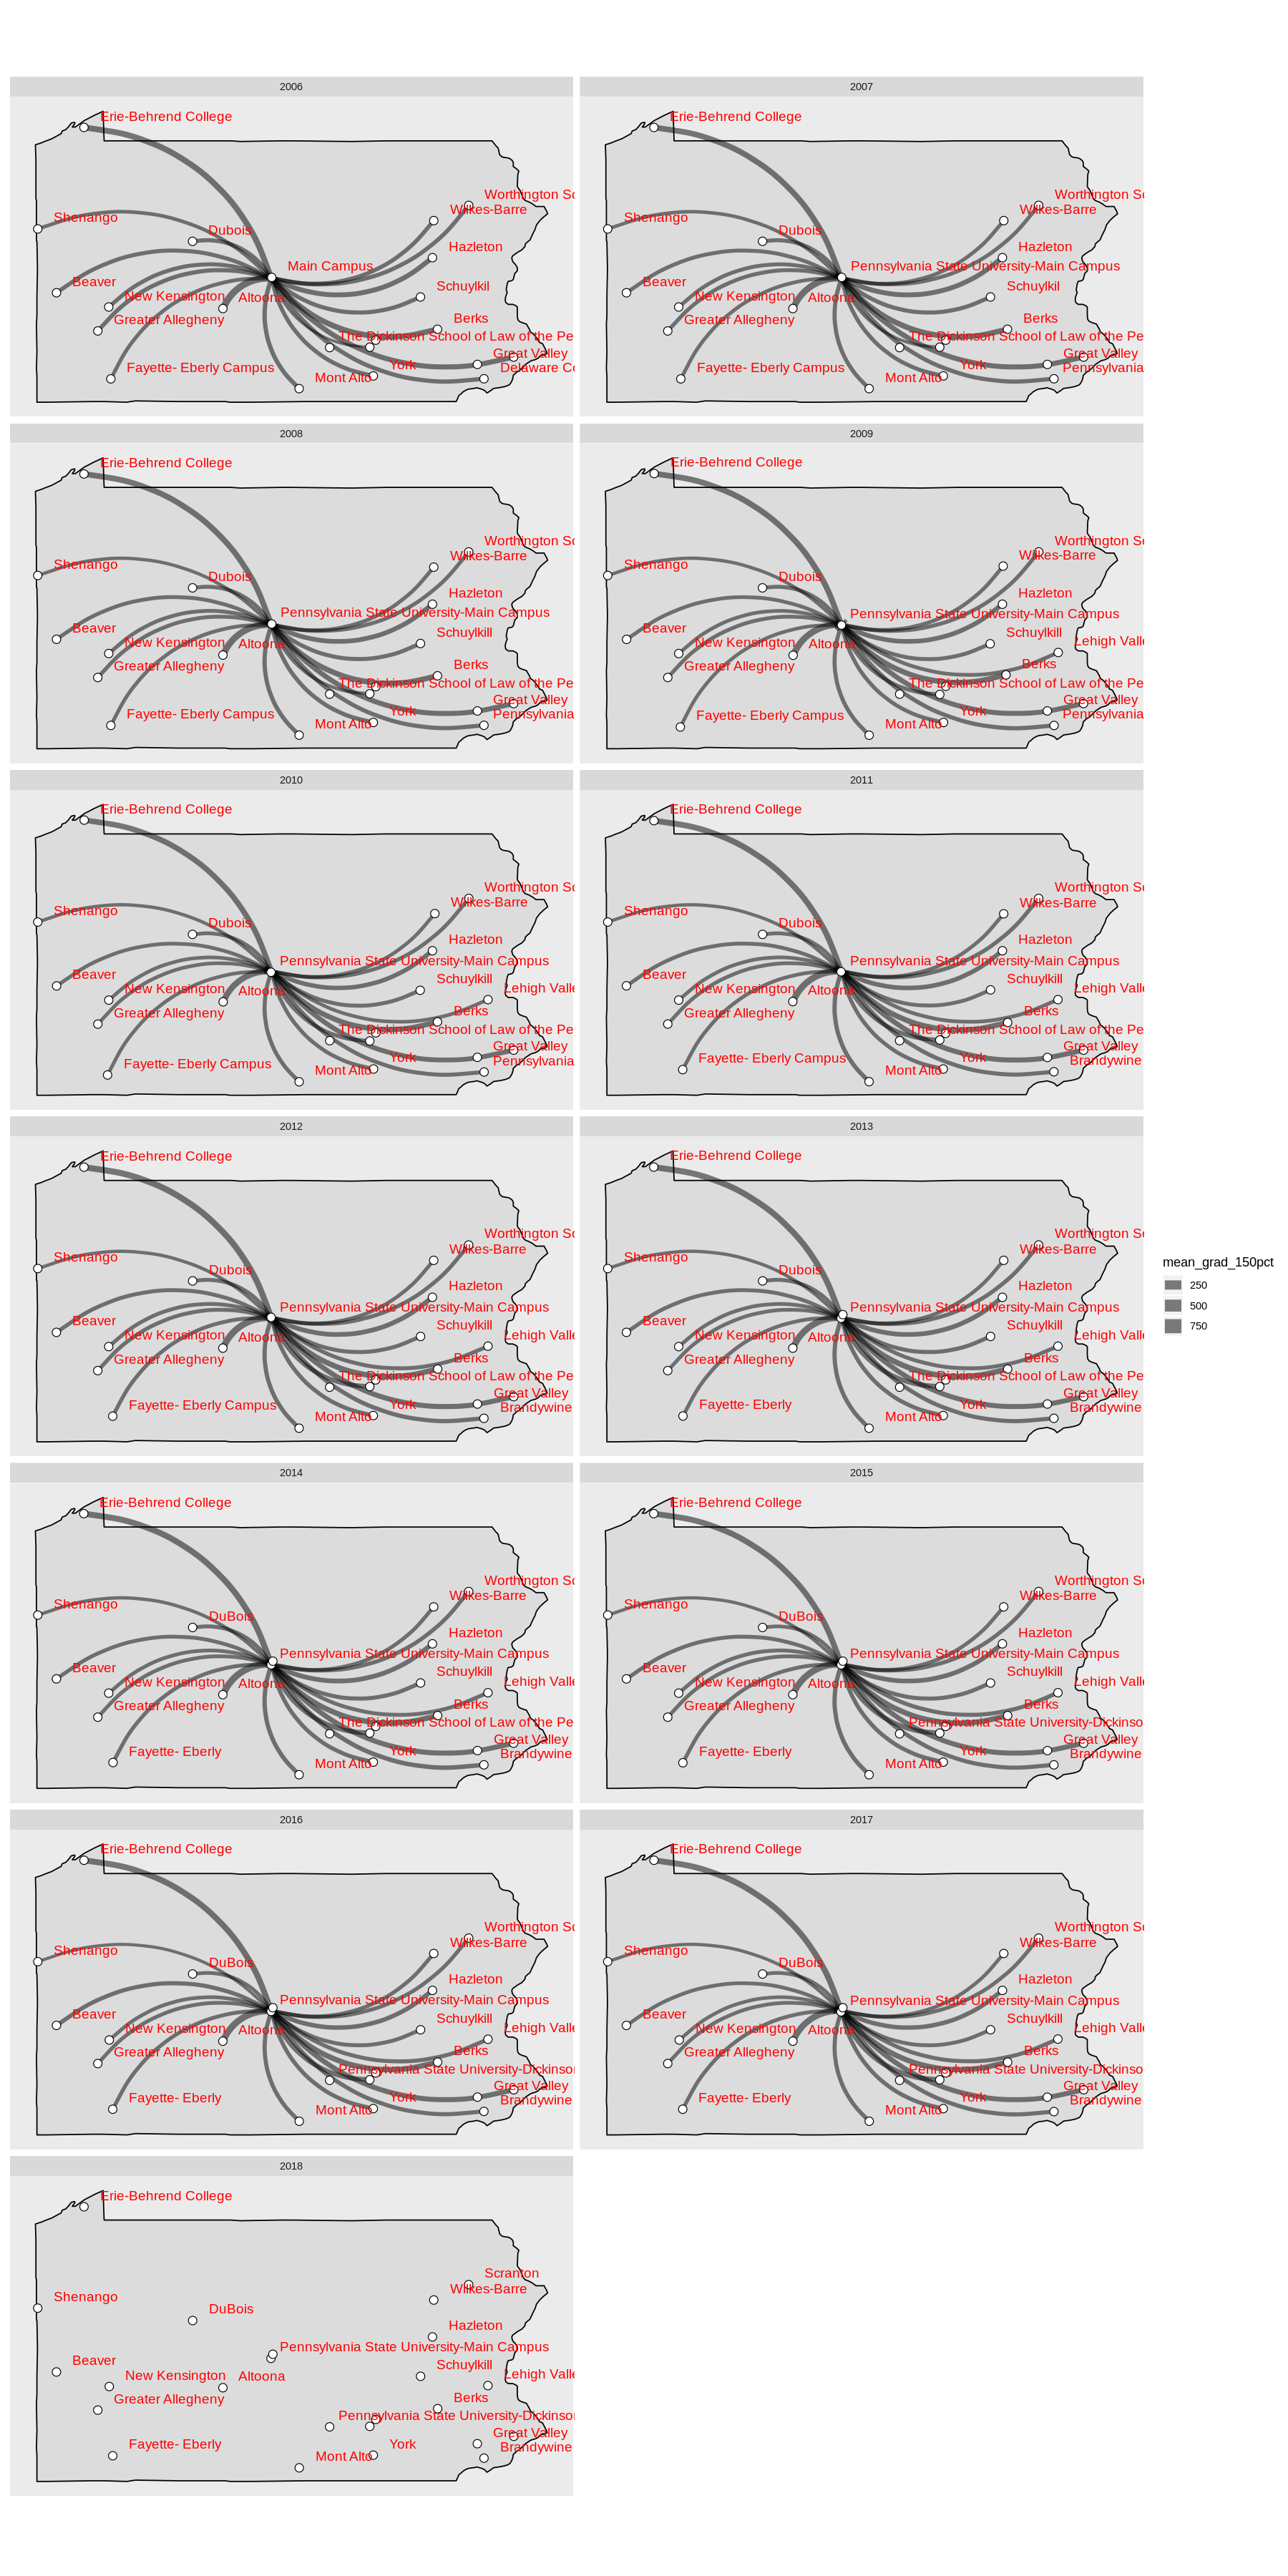

In [97]:
library(maps)
library(mapdata)
library(ggplot2)

options(repr.plot.width=15, repr.plot.height=30)

states = map_data("state")


pa_state = subset(states, region == "pennsylvania")


counties = map_data("county")
ditch_the_axis <- theme(
  axis.text = element_blank(),
  axis.line = element_blank(),
  axis.ticks = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.title = element_blank()
)

pa_base <- ggplot(data = pa_state, mapping = aes(x = long, y = lat)) +
  coord_fixed(1.3) + geom_polygon(color = "black", fill = "gainsboro")

pa_base+ditch_the_axis +
geom_curve(aes(x = avg_longitude, y = avg_latitude, xend = longitude, yend = latitude,     
                 , size = mean_grad_150pct ),
             data = df_city_coord_staging  #%>%filter(!is.na(mean_grad_150pct))
           ,
           curvature = 0.33,
             alpha = 0.5)+
scale_size_continuous() +
geom_point(aes(x = longitude, y = latitude), size = 3,           
             shape = 21, fill = 'white',
             color = 'black', stroke = 0.5,data=df_city_coord_staging) +
geom_text(aes(x = longitude, y = latitude, label = gsub("Pennsylvania State University-Penn State"," ",df_city_coord_staging$inst_name)),             # draw text labels
            hjust = 0, nudge_x = 0.1, nudge_y = 0.1,
            size = 4, color = "red", fontface = "plain",data =df_city_coord_staging, check_overlap = TRUE ) +
facet_wrap(~year,ncol =2)

In [92]:
df_city_coord_staging %>% filter(year==2018)

year,state_abbr,parent_opeid,child_opeid,inst_name,unitid,latitude,longitude,mean_grad_150pct,city,avg_latitude,avg_longitude
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2018,PA,003329,22,Pennsylvania State University-Dickinson Law,212018,40.19944,-77.19779,NA,Carlisle,40.8054,-77.85914
2018,PA,003329,05,Pennsylvania State University-Penn State Erie-Behrend College,214591,42.11943,-79.98377,NA,Erie,40.8054,-77.85914
2018,PA,003329,19,Pennsylvania State University-Penn State Great Valley,214607,40.05226,-75.52254,NA,Malvern,40.8054,-77.85914
2018,PA,003329,01,Pennsylvania State University-College of Medicine,214616,40.26424,-76.67408,NA,Hershey,40.8054,-77.85914
2018,PA,003329,12,Pennsylvania State University-Penn State New Kensington,214625,40.55116,-79.69724,NA,New Kensington,40.8054,-77.85914
2018,PA,003329,16,Pennsylvania State University-Penn State Shenango,214634,41.23505,-80.50877,NA,Sharon,40.8054,-77.85914
2018,PA,003329,17,Pennsylvania State University-Penn State Wilkes-Barre,214643,41.30600,-76.01660,NA,Lehman,40.8054,-77.85914
2018,PA,003329,15,Pennsylvania State University-Penn State Scranton,214652,41.44026,-75.62058,NA,Dunmore,40.8054,-77.85914
2018,PA,003329,02,Pennsylvania State University-Penn State Lehigh Valley,214670,40.55921,-75.40250,NA,Center Valley,40.8054,-77.85914


In [ ]:
df_city_coord_staging %>% select()

In [33]:
colnames(df_city_coord_staging)

[1] "year"             "state_abbr"       "parent_opeid"     "child_opeid"     
 [5] "inst_name"        "unitid"           "latitude"         "longitude"       
 [9] "mean_grad_150pct" "city"             "avg_latitude"     "avg_longitude"

In [19]:
class(pa_state)

[1] "data.frame"

In [88]:
# institutional-characteristics
# finance
# enrollment-full-time-equivalent
# outcome-measures
# grad-rates